<a href="https://colab.research.google.com/github/furkanoruc/Thesis-Code-Maritime/blob/main/Thesis_Code_November_2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#libs
import numpy as np 
import seaborn as sns
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import os
import sys
import glob

In [ ]:
#Encounter Dataset
!wget -O data1.zip https://www.dropbox.com/sh/7q9hzgw3o11b58t/AACOAH_xyEKuGOwnZEq_WlMma?dl=0

--2022-11-13 17:48:17--  https://www.dropbox.com/sh/7q9hzgw3o11b58t/AACOAH_xyEKuGOwnZEq_WlMma?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.5.18, 2620:100:601d:18::a27d:512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.5.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /sh/raw/7q9hzgw3o11b58t/AACOAH_xyEKuGOwnZEq_WlMma [following]
--2022-11-13 17:48:17--  https://www.dropbox.com/sh/raw/7q9hzgw3o11b58t/AACOAH_xyEKuGOwnZEq_WlMma
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc459ffe0c9fc6066a748e34f0d6.dl.dropboxusercontent.com/zip_download_get/BUHj460vKQl7PMlt3rECoQ3VA27o_lAsYB_vf-4u9_PHY1qN391zqGJeN3BIGp2aIQZr10wagLBw9Sx0FhRcYt1iuvv4cwdNAYcy7JhHkrwI0Q# [following]
--2022-11-13 17:48:18--  https://uc459ffe0c9fc6066a748e34f0d6.dl.dropboxusercontent.com/zip_download_get/BUHj460vKQl7PMlt3rECoQ3VA27o_lAsYB_vf-4u9_PHY1qN391zqGJeN3BIGp2aIQZr10wagLBw9Sx0FhRcYt1iuvv4

In [ ]:
!unzip data1.zip -x / -d data

Archive:  data1.zip
 extracting: data/df_input_30_07.csv  
 extracting: data/df_combined_final_0_10m.csv  
 extracting: data/df_combined_final_10m_20m.csv  
 extracting: data/df_combined_final_20m_30m.csv  
 extracting: data/df_combined_final_30m_40m.csv  
 extracting: data/df_combined_final_40m_50m.csv  
 extracting: data/df_combined_final_50m_60m.csv  
 extracting: data/df_combined_final_60m_70m.csv  
 extracting: data/df_combined_final_70m_80m.csv  
 extracting: data/df_combined_final_80m_90m.csv  
 extracting: data/df_combined_final_90m_100m.csv  
 extracting: data/df_combined_final_100m_106m.csv  


In [ ]:
all_files = glob.glob(os.path.join("/content/data", "*.csv"))
all_files.sort()


In [ ]:
df = pd.read_csv(all_files[0])

In [ ]:
# Merging, RAM not enough. 

#df_1 = pd.concat((pd.read_csv(f) for f in all_files[0:5]), ignore_index=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000001 entries, 0 to 10000000
Data columns (total 35 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   Unnamed: 0                int64  
 1   MMSI                      int64  
 2   SPEED_KNOTSX10            int64  
 3   LAT                       float64
 4   LON                       float64
 5   COURSE                    int64  
 6   HEADING                   float64
 7   STATUS                    float64
 8   TIMESTAMP                 object 
 9   trip_id_MMSI              int64  
 10  index1                    int64  
 11  corresponding_message_id  int64  
 12  MMSI_Target               int64  
 13  SPEED_KNOTSX10_Target     float64
 14  LAT_Target                float64
 15  LON_Target                float64
 16  COURSE_Target             float64
 17  STATUS_Target             float64
 18  trip_id_MMSI_Target       int64  
 19  Course_Target_Degrees     float64
 20  IMO                   

In [ ]:
df.describe()

,Unnamed: 0,MMSI,SPEED_KNOTSX10,LAT,LON,COURSE,HEADING,STATUS,trip_id_MMSI,index1,...,SHIP_ID,LENGTH,WIDTH,IMO_Target,SHIP_ID_Target,LENGTH_Target,WIDTH_Target,WIND_ANGLE,WIND_SPEED,WIND_TEMP
count,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,9.999994e+06,1.000000e+07,1.000000e+07,...,9.999129e+06,9.999129e+06,9.999129e+06,9.999129e+06,9.999129e+06,9.999129e+06,9.999129e+06,8.127135e+06,8.127135e+06,8.127135e+06
mean,5.000000e+06,2.813697e+08,7.601321e+01,4.104996e+01,2.902136e+01,1.674671e+02,4.663781e+02,8.715094e+01,8.783491e+01,4.337614e+06,...,1.274090e+06,4.057812e+01,8.895125e+00,2.430413e+06,1.232567e+06,4.098412e+01,8.955108e+00,1.133551e+02,7.107070e+00,1.920819e+01
std,2.886752e+06,5.751278e+07,3.346459e+01,3.999976e-02,3.523905e-02,1.074955e+02,1.233411e+02,3.193033e+01,9.738706e+01,2.295438e+06,...,1.848913e+06,3.861586e+01,5.979161e+00,3.986125e+06,1.808514e+06,3.872156e+01,5.977998e+00,1.319451e+02,3.766605e+00,2.580712e+00
min,0.000000e+00,1.000000e+00,1.100000e+01,4.097583e+01,2.892205e+01,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.290000e+02,...,1.524000e+03,0.000000e+00,0.000000e+00,0.000000e+00,1.524000e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+01
25%,2.500000e+06,2.710103e+08,5.100000e+01,4.102060e+01,2.899221e+01,5.600000e+01,5.110000e+02,9.900000e+01,2.300000e+01,2.495666e+06,...,3.363600e+05,1.800000e+01,5.000000e+00,0.000000e+00,3.363540e+05,1.800000e+01,5.000000e+00,1.600000e+01,4.000000e+00,1.700000e+01
50%,5.000000e+06,2.710150e+08,7.600000e+01,4.103316e+01,2.901283e+01,1.820000e+02,5.110000e+02,9.900000e+01,6.300000e+01,4.297377e+06,...,3.370400e+05,3.300000e+01,8.000000e+00,0.000000e+00,3.368800e+05,3.400000e+01,8.000000e+00,3.100000e+01,7.000000e+00,2.000000e+01
75%,7.500000e+06,2.710440e+08,1.000000e+02,4.107769e+01,2.905493e+01,2.490000e+02,5.110000e+02,9.900000e+01,1.180000e+02,6.214797e+06,...,4.208760e+05,4.200000e+01,1.000000e+01,7.900091e+06,3.653540e+05,4.200000e+01,1.000000e+01,2.410000e+02,1.000000e+01,2.100000e+01
max,1.000000e+07,1.000000e+09,5.070000e+02,4.123863e+01,2.918033e+01,3.590000e+02,5.110000e+02,9.900000e+01,8.640000e+02,9.297624e+06,...,6.746117e+06,3.000000e+02,5.006000e+01,9.873096e+06,6.746117e+06,3.000000e+02,5.006000e+01,3.590000e+02,1.700000e+01,2.500000e+01


In [ ]:
#df.head().to_csv("df_head.csv")

In [ ]:
df_mmsi_size = pd.DataFrame({'MMSI_Count': df.groupby(["MMSI"]).size()}).reset_index()
df_mmsi_size_filtered = df_mmsi_size[df_mmsi_size["MMSI_Count"]>60000].copy()

In [ ]:
df_mmsi_size_filtered

,MMSI,MMSI_Count
481,271001039,80580
555,271002504,88302
570,271002578,85269
798,271010683,61133
1110,271044098,71581
1120,271044172,75445
1123,271044201,75773
1124,271044216,72591


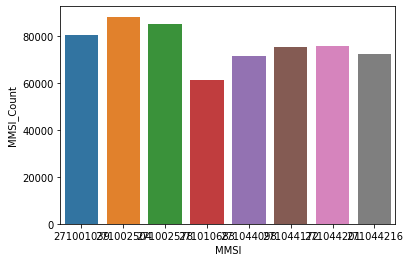

In [ ]:
sns.barplot(data=df_mmsi_size_filtered, x="MMSI", y="MMSI_Count")

In [ ]:
df.groupby("SHIP_ID").size()

SHIP_ID
1524.0        463
1545.0        742
1590.0        109
1605.0        278
1622.0       1217
             ... 
5936230.0     324
5937972.0       7
5940268.0     600
6270156.0     379
6746117.0     576
Length: 2440, dtype: int64

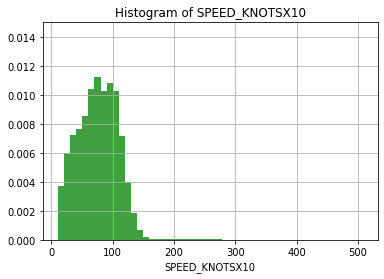

In [ ]:
n, bins, patches = plt.hist(df["SPEED_KNOTSX10"], 50, density=True, facecolor='g', alpha=0.75)

plt.xlabel('SPEED_KNOTSX10')
plt.title('Histogram of SPEED_KNOTSX10')
plt.ylim(0, 0.015)
plt.grid(True)
plt.show()

# Outliers above 160-170

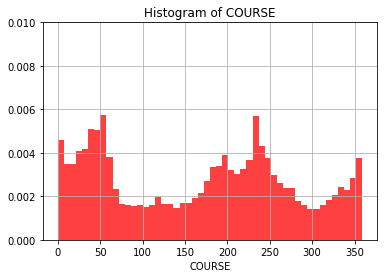

In [ ]:
n, bins, patches = plt.hist(df["COURSE"], 50, density=True, facecolor='r', alpha=0.75)


plt.xlabel('COURSE')
plt.title('Histogram of COURSE')
plt.ylim(0, 0.01)
plt.grid(True)
plt.show()

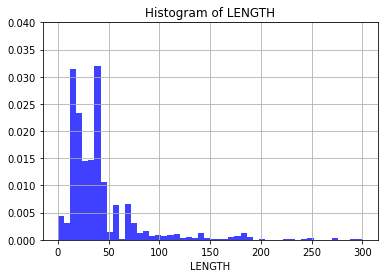

In [ ]:
n, bins, patches = plt.hist(df["LENGTH"], 50, density=True, facecolor='b', alpha=0.75)


plt.xlabel('LENGTH')
plt.title('Histogram of LENGTH')
plt.ylim(0, 0.04)
plt.grid(True)
plt.show()

# Large majority are local ships.

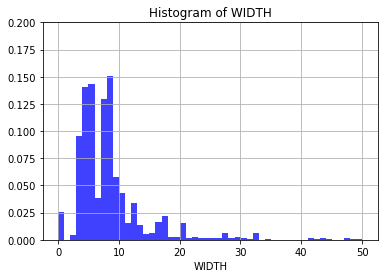

In [ ]:
n, bins, patches = plt.hist(df["WIDTH"], 50, density=True, facecolor='b', alpha=0.75)


plt.xlabel('WIDTH')
plt.title('Histogram of WIDTH')
plt.ylim(0, 0.2)
plt.grid(True)
plt.show()

# Large majority are local ships - less than 10 meters width.

In [ ]:
df.groupby(["TYPE_NAME"]).size().max()
df_TYPE_NAME_size = pd.DataFrame({'TYPE_NAME_Count': df.groupby(["TYPE_NAME"]).size()}).reset_index()
df_TYPE_NAME_size_filtered = df_TYPE_NAME_size[df_TYPE_NAME_size["TYPE_NAME_Count"]>100000].copy()

In [ ]:
df_TYPE_NAME_size_filtered

,TYPE_NAME,TYPE_NAME_Count
2,Bulk Carrier,148278
18,General Cargo,430632
38,Passenger,4053665
39,Passenger Ship,1200157
41,Pleasure Craft,2817474
47,Ro-Ro/Passenger Ship,395218
49,Sailing Vessel,193388
56,Tug,182786


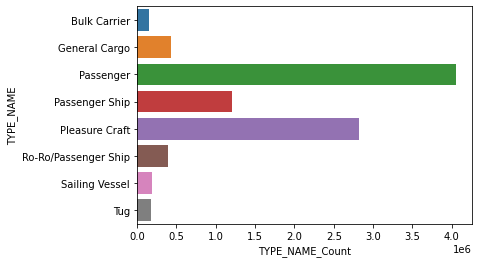

In [ ]:
sns.barplot(data=df_TYPE_NAME_size_filtered, y="TYPE_NAME", x="TYPE_NAME_Count")